In [49]:
import pandas as pd
import dask.dataframe as dd #https://medium.com/analytics-vidhya/optimized-ways-to-read-large-csvs-in-python-ab2b36a7914e
                            #READ ABOUT DASK
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
#Read the dataset extensions
#df1 = dd.read_csv("steam_reviews_bonus_1.csv") #engine='python')
#df2 = dd.read_csv("steam_reviews_bonus_2.csv") #engine='python')

In [51]:
#Add them to the original dataset
#df1.to_csv("steam_reviews.csv", mode="a", header=None, index=False)
#df2.to_csv("steam_reviews.csv", mode="a", header=None, index=False)

In [52]:
#Import the extended dataset
#df = dd.read_csv('steam_reviews.csv', engine='python', usecols= ["app_id","review", "weighted_vote_score", "steam_purchase", "received_for_free"])

In [53]:
#These cells should print the length of df
#df['app_id'].count().compute()

In [54]:
#len(df.index)#ritorna il numero di righe

In [55]:
#le colonne di interesse sono app_id (int64), review, 
#weighted_vote_scre,
#steam_purchase, received_for_free, recommended


In [56]:
#import the dataset
#df = pd.DataFrame()
#for chunk in pd.read_csv("steam_reviews.csv", chunksize=100_000):
#    print("\r"+str(len(df)), end="")
#    df = pd.concat([df, chunk], ignore_index=True)

In [57]:
#for now work on 0.1% of the dataset
import random
p=0.001
df = pd.read_csv("steam_reviews.csv", header=0, skiprows=lambda i: i>0 and random.random() > p)

# RQ1 Exploratory Data Analysis (EDA)

In [58]:
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21416 entries, 0 to 21415
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      21416 non-null  int64  
 1   app_id                          21416 non-null  int64  
 2   app_name                        21416 non-null  object 
 3   review_id                       21416 non-null  int64  
 4   language                        21416 non-null  object 
 5   review                          21390 non-null  object 
 6   timestamp_created               21416 non-null  int64  
 7   timestamp_updated               21416 non-null  int64  
 8   recommended                     21416 non-null  bool   
 9   votes_helpful                   21416 non-null  int64  
 10  votes_funny                     21416 non-null  int64  
 11  weighted_vote_score             21416 non-null  float64
 12  comment_count                   

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,150,292030,The Witcher 3: Wild Hunt,85152553,russian,"-Ты чудесно пахнешь\n-Геральт, мы на похоронах...",1611333843,1611333843,True,3,...,True,False,False,76561198967994588,59,2,15508.0,0.0,15508.0,1.607008e+09
1,3629,292030,The Witcher 3: Wild Hunt,84529478,english,Play this game. The only true RPGs I had playe...,1610422421,1610422421,True,0,...,True,False,False,76561198056645060,103,3,5573.0,2035.0,4444.0,1.611195e+09
2,4164,292030,The Witcher 3: Wild Hunt,84442215,russian,Очень крутая игра!,1610299679,1610299679,True,0,...,True,False,False,76561199089705400,3,1,3625.0,2706.0,1805.0,1.611294e+09
3,4375,292030,The Witcher 3: Wild Hunt,84414963,russian,2077,1610266895,1610266895,True,0,...,True,False,False,76561198800266353,64,3,17894.0,2271.0,16432.0,1.611388e+09
4,5071,292030,The Witcher 3: Wild Hunt,84312391,spanish,Esta bien compadre,1610137041,1610137041,True,1,...,True,False,False,76561198100942232,16,3,1089.0,487.0,221.0,1.611251e+09


In [59]:
df.duplicated() #Returns a boolean Series denoting duplicate rows

0        False
1        False
2        False
3        False
4        False
         ...  
21411    False
21412    False
21413    False
21414    False
21415    False
Length: 21416, dtype: bool

In [60]:
df.memory_usage( )

Index                                128
Unnamed: 0                        171328
app_id                            171328
app_name                          171328
review_id                         171328
language                          171328
review                            171328
timestamp_created                 171328
timestamp_updated                 171328
recommended                        21416
votes_helpful                     171328
votes_funny                       171328
weighted_vote_score               171328
comment_count                     171328
steam_purchase                     21416
received_for_free                  21416
written_during_early_access        21416
author.steamid                    171328
author.num_games_owned            171328
author.num_reviews                171328
author.playtime_forever           171328
author.playtime_last_two_weeks    171328
author.playtime_at_review         171328
author.last_played                171328
dtype: int64

In [61]:
df.isnull().sum()

Unnamed: 0                         0
app_id                             0
app_name                           0
review_id                          0
language                           0
review                            26
timestamp_created                  0
timestamp_updated                  0
recommended                        0
votes_helpful                      0
votes_funny                        0
weighted_vote_score                0
comment_count                      0
steam_purchase                     0
received_for_free                  0
written_during_early_access        0
author.steamid                     0
author.num_games_owned             0
author.num_reviews                 0
author.playtime_forever            0
author.playtime_last_two_weeks     0
author.playtime_at_review         23
author.last_played                 0
dtype: int64

<AxesSubplot:>

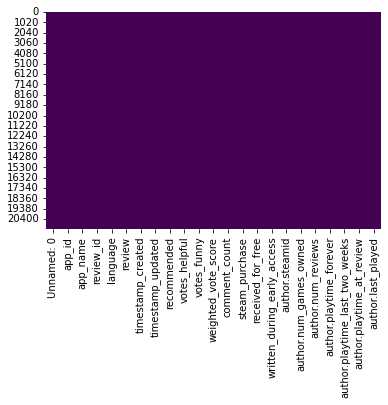

In [62]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

<AxesSubplot:>

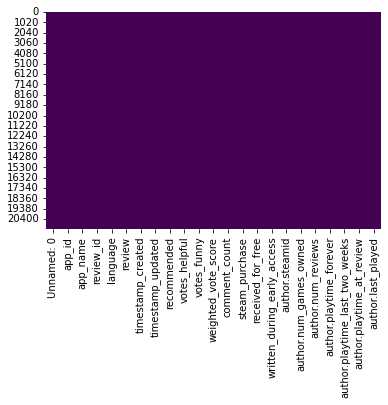

In [63]:
#Replace null values with mean of the column
df["author.playtime_at_review"]=pd.to_numeric(df["author.playtime_at_review"])
df["author.playtime_at_review"].fillna(df["author.playtime_at_review"].mean(), inplace=True)
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

<AxesSubplot:>

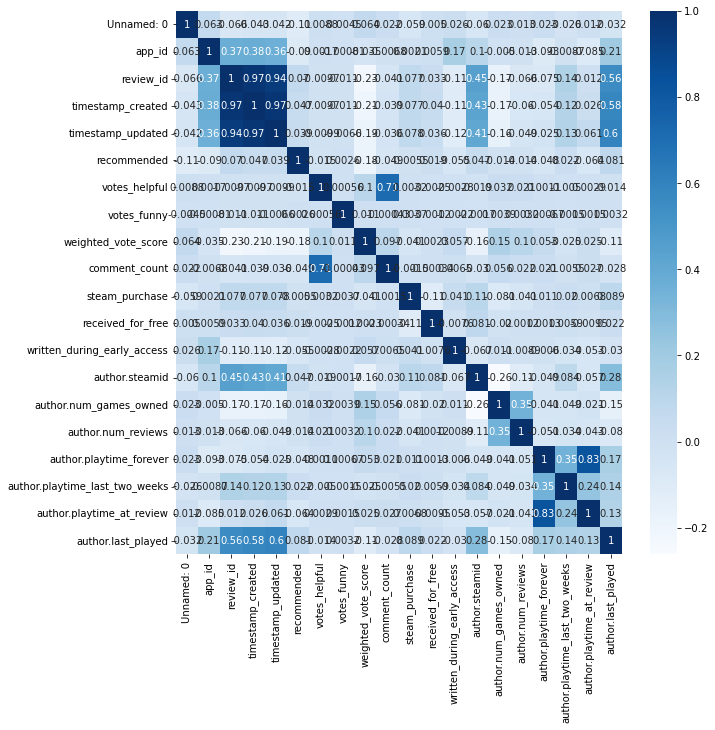

In [64]:
#Visualize how related are the entries
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

Text(0, 0.5, 'timestamp_updated')

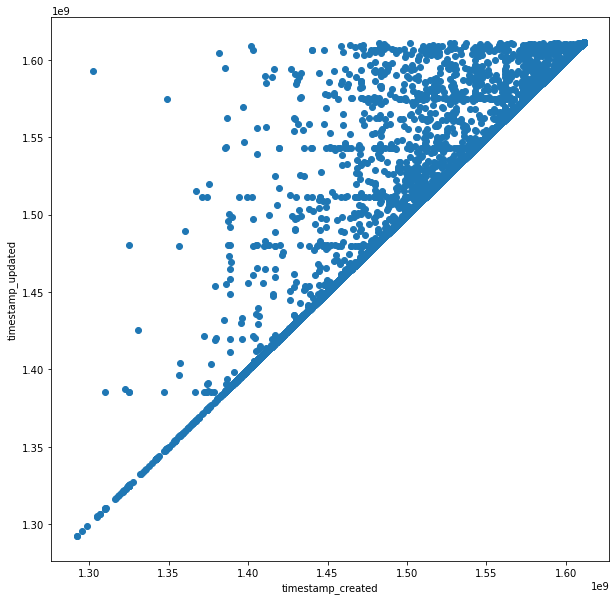

In [65]:
#we notice a high correlation between timestamp updated and created--->
#--->compare timestamp created vs updated
plt.figure(figsize=(10,10))
plt.scatter(x='timestamp_created',y='timestamp_updated',data=df)
plt.xlabel('timestamp_created')
plt.ylabel('timestamp_updated')

# RQ2

### Plot the number of reviews for each application in descending order

In [66]:
df["app_name"].value_counts()

PLAYERUNKNOWN'S BATTLEGROUNDS     1600
Grand Theft Auto V                 980
Tom Clancy's Rainbow Six Siege     853
Terraria                           671
Garry's Mod                        642
                                  ... 
Townscaper                           1
WWE 2K19                             1
Volgarr the Viking                   1
The End Is Nigh                      1
Clicker Heroes 2                     1
Name: app_name, Length: 307, dtype: int64

/home/simone/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 19977 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/simone/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/simone/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 32676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/simone/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 33521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/simone/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/simone/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py

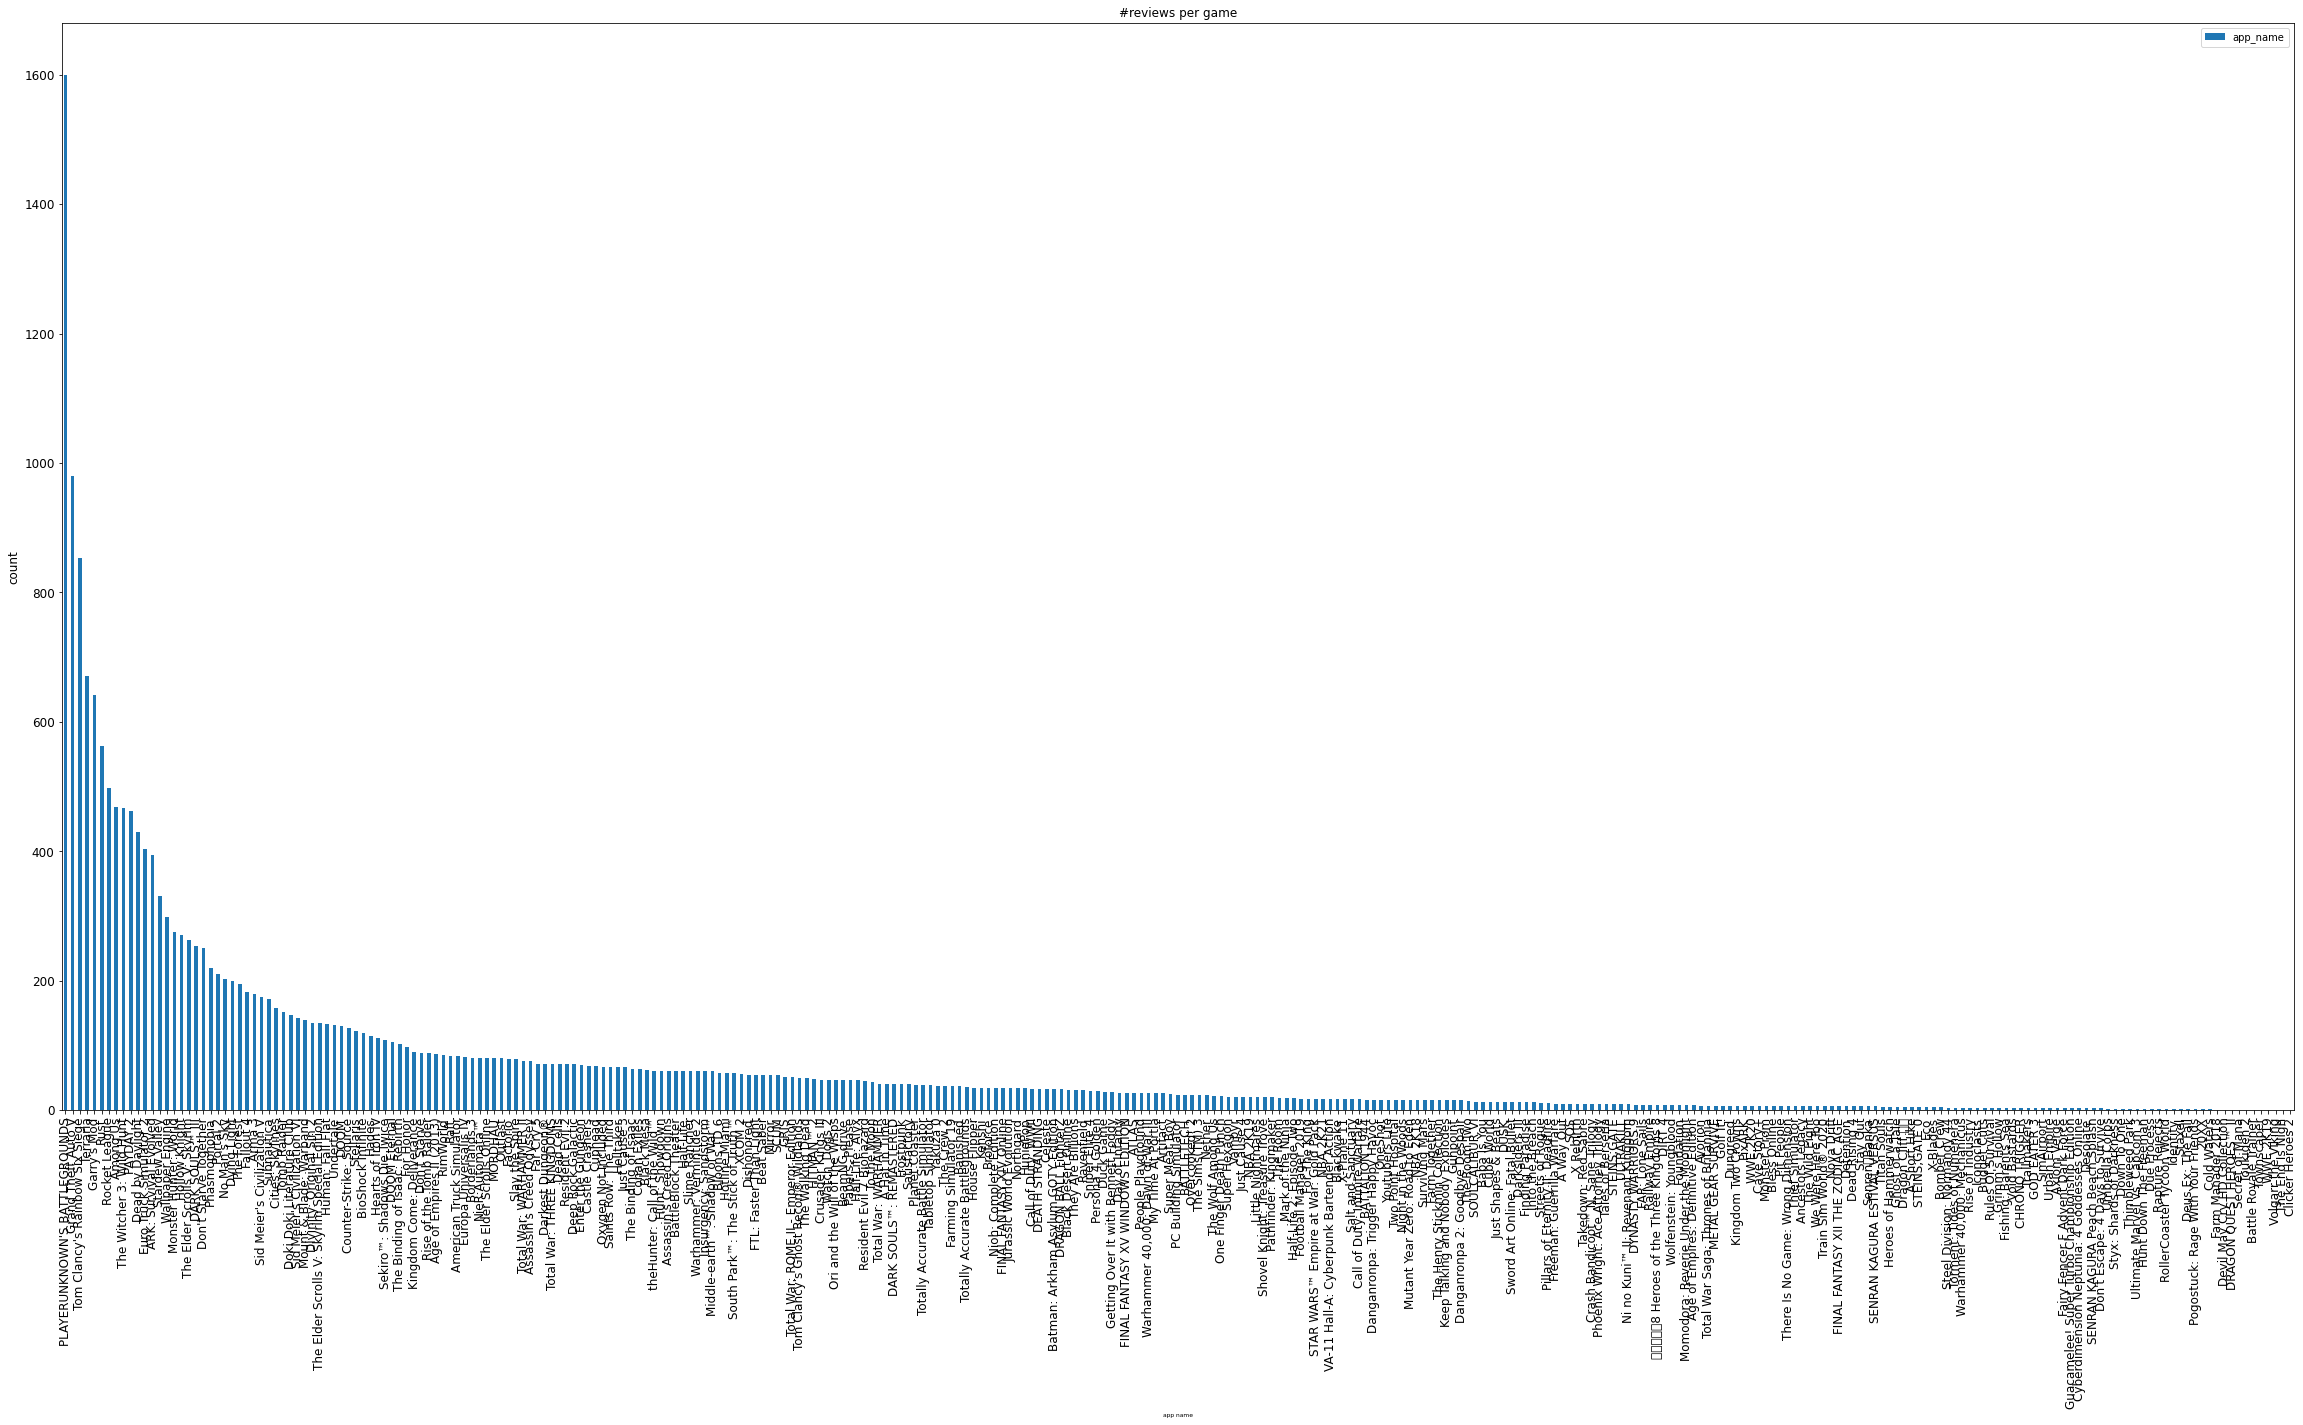

In [67]:
#The only way to read the names is by saving the image and then zooming in
ax=df["app_name"].value_counts().plot(kind='bar', title ="#reviews per game", figsize=(40,20), legend=True, fontsize=12)
ax.set_xlabel("app name", fontsize=6)
ax.set_ylabel("count", fontsize=12)
plt.show()

### What applications have the best Weighted Vote Score?

In [68]:
#It's not clear whether we have to take the games with the highest weighted score or do some sort of operation for every game (like a mean) 
#and take the ones with the highest values -----> we'll implement both approaches

In [69]:
#Here we just pick the 10 games with the highest score
df[["app_name", "weighted_vote_score"]].nlargest(10, "weighted_vote_score")

,app_name,weighted_vote_score
5465,Stardew Valley,0.975986
9164,Mirror,0.948656
8563,Mount & Blade: Warband,0.946757
4860,Warhammer: Vermintide 2,0.928029
16527,No Man's Sky,0.926630
16058,Kingdom Come: Deliverance,0.926388
10576,Oxygen Not Included,0.917726
17082,DARK SOULS™ III,0.913872
4478,Wallpaper Engine,0.910718
9433,Undertale,0.908331


In [70]:
#MEAN METHOD
app_vote_mean = df[["app_name", "weighted_vote_score"]].groupby('app_name').mean()
app_vote_mean.nlargest(10, "weighted_vote_score")

,weighted_vote_score
app_name,
SENRAN KAGURA ESTIVAL VERSUS,0.629662
Umbrella Corps,0.614535
Townscaper,0.565217
Devil May Cry HD Collection,0.502825
SENRAN KAGURA Peach Beach Splash,0.500364
The End Is Nigh,0.498084
Stay Out,0.477069
The Wild Eight,0.474333
DYNASTY WARRIORS 9,0.472794


### Which applications have the most and the least recommendations?

In [71]:
#recommended----> name of the col to use